In [1]:
file_path = 'enron1/ham/0007.1999-12-14.farmer.ham.txt'
with open(file_path, 'r') as infile:
    ham_sample = infile.read()
print(ham_sample)

Subject: mcmullen gas for 11 / 99
jackie ,
since the inlet to 3 river plant is shut in on 10 / 19 / 99 ( the last day of
flow ) :
at what meter is the mcmullen gas being diverted to ?
at what meter is hpl buying the residue gas ? ( this is the gas from teco ,
vastar , vintage , tejones , and swift )
i still see active deals at meter 3405 in path manager for teco , vastar ,
vintage , tejones , and swift
i also see gas scheduled in pops at meter 3404 and 3405 .
please advice . we need to resolve this as soon as possible so settlement
can send out payments .
thanks


In [2]:
file_path = 'enron1/spam/0058.2003-12-21.GP.spam.txt'
with open(file_path, 'r') as infile:
    spam_sample = infile.read()
print(spam_sample)

Subject: stacey automated system generating 8 k per week parallelogram
people are
getting rich using this system ! now it ' s your
turn !
we ' ve
cracked the code and will show you . . . .
this is the
only system that does everything for you , so you can make
money
. . . . . . . .
because your
success is . . . completely automated !
let me show
you how !
click
here
to opt out click here % random _ text



In [3]:
import glob, os
emails, labels = [], []

In [4]:
file_path = 'enron1/spam/'
for filename in glob.glob(os.path.join(file_path, '*.txt')):
    with open(filename, 'r', encoding='ISO-8859-1') as infile:
        emails.append(infile.read())
        labels.append(1)

file_path = 'enron1/ham/'
for filename in glob.glob(os.path.join(file_path, '*.txt')):
    with open(filename, 'r', encoding='ISO-8859-1') as infile:
        emails.append(infile.read())
        labels.append(0)

print(len(emails))
print(len(labels))

5172
5172


In [5]:
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
def is_letter_only(word):
    return word.isalpha()
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

In [6]:
def clean_text(docs):
    docs_cleaned = []
    for doc in docs:
        doc = doc.lower()
        doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if is_letter_only(word) and word not in all_names)
        docs_cleaned.append(doc_cleaned)
    return docs_cleaned

emails_cleaned = clean_text(emails)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', max_features=1000, max_df=0.5, min_df=2)
docs_cv = cv.fit_transform(emails_cleaned)

In [8]:
print(docs_cv[0])

  (0, 265)	2
  (0, 481)	2
  (0, 362)	2
  (0, 229)	1
  (0, 360)	2
  (0, 103)	1
  (0, 997)	1
  (0, 86)	2
  (0, 72)	1
  (0, 475)	1
  (0, 898)	1
  (0, 690)	1
  (0, 505)	1
  (0, 865)	1
  (0, 584)	1
  (0, 151)	1
  (0, 714)	1
  (0, 969)	1
  (0, 933)	1


In [10]:
terms = cv.get_feature_names()
print(terms[265])
print(terms[933])

energy
unsubscribe


In [21]:
from collections import defaultdict

def get_label_index(labels):
    label_index = defaultdict(list)
    for index, label in enumerate(labels):
        label_index[label].append(index)
    return label_index

label_index = get_label_index(labels)

In [19]:
def get_prior(label_index):
    prior = {label: len(index) for label, index in label_index.items()}
    total_count = sum(prior.values())
    for label in prior:
        prior[label] /= float(total_count)
    return prior

prior = get_prior(label_index)
print('Prior:', prior)

Prior: {1: 0.2900232018561485, 0: 0.7099767981438515}


In [26]:
import numpy as np
def get_likelihood(term_matrix, label_index, smoothing=0):
    likelihood = {}
    for label, index in label_index.items():
        likelihood[label] = term_matrix[index, :].sum(axis=0) + smoothing
        likelihood[label] = np.asarray(likelihood[label])[0]
        total_count = likelihood[label].sum()
        likelihood[label] = likelihood[label] / float(total_count)
    return likelihood

smoothing = 1
likelihood = get_likelihood(docs_cv, label_index, smoothing)

In [34]:
def get_posterior(term_matrix, prior, likelihood):
    num_docs = term_matrix.shape[0]
    posteriors = []
    
    for i in range(num_docs):
        posterior = {key: np.log(prior_label) for key, prior_label in prior.items()}
        for label, likelihood_label in likelihood.items():
            term_document_vector = term_matrix.getrow(i)
            counts = term_document_vector.data
            indices = term_document_vector.indices
            for count, index in zip(counts, indices):
                posterior[label] += np.log(likelihood_label[index]) * count
        
        min_log_posterior = min(posterior.values())
        for label in posterior:
            try:
                posterior[label] = np.exp(posterior[label] - min_log_posterior)
            except:
                posterior[label] = float('inf')
        sum_posterior = sum(posterior.values())
        for label in posterior:
            if posterior[label] == float('inf'):
                posterior[label] = 1.0
            else:
                posterior[label] /= sum_posterior
        posteriors.append(posterior.copy())
    
    return posteriors

In [31]:
emails_test = [
'''Subject: flat screens
   hello ,
   please call or contact regarding the other flat screens
   requested .
   trisha tlapek - eb 3132 b
   michael sergeev - eb 3132 a
   also the sun blocker that was taken away from eb 3131 a .
   trisha should two monitors also michael .
   thanks
   kevin moore''',
'''Subject: let ' s stop the mlm insanity !
   still believe you can earn $ 100 , 000 fast in mlm ? get real !
   get emm , a brand new system that replaces mlm with something that works !
   start earning 1 , 000 ' s now ! up to $ 10 , 000 per week doing simple
   online tasks .
   free info - breakfree @ luxmail . com - type " send emm info " in the
   subject box .
   this message is sent in compliance of the proposed bill section 301 per
   section 301 , paragraph ( a ) ( 2 ) ( c ) of s . 1618 . further transmission
   to you by the sender of this e - mail may be stopped at no cost to you by
   sending a reply to : " email address " with the word remove in the subject
   line .''',
]

In [35]:
emails_cleaned_test = clean_text(emails_test)
term_docs_test = cv.transform(emails_cleaned_test)
posterior = get_posterior(term_docs_test, prior, likelihood)
print(posterior)

[{1: 5.8180231479630904e-08, 0: 0.9999999418197685}, {1: 0.9999999999999944, 0: 5.503101685049805e-15}]


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(emails_cleaned, labels, test_size=0.33, random_state=42)
print(len(X_train), len(X_test), len(Y_train), len(Y_test))

3465 1707 3465 1707


In [38]:
term_docs_train = cv.fit_transform(X_train)
label_index = get_label_index(Y_train)
prior = get_prior(label_index)
likelihood = get_likelihood(term_docs_train, label_index, smoothing)

In [39]:
term_docs_test = cv.transform(X_test)
posterior = get_posterior(term_docs_test, prior, likelihood)

correct = 0.0
for pred, actual in zip(posterior, Y_test):
    if actual == 1:
        if pred[1] >= 0.5:
            correct += 1
    elif pred[0] > 0.5:
        correct += 1

print('The accuracy on {0} testing samples is: {1:.1f}%'.format(len(Y_test), correct/len(Y_test)*100))

The accuracy on 1707 testing samples is: 93.0%


<ipython-input-34-368601982a41>:17: RuntimeWarning: overflow encountered in exp
  posterior[label] = np.exp(posterior[label] - min_log_posterior)


In [40]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=1.0, fit_prior=True)
clf.fit(term_docs_train, Y_train)

MultinomialNB()

In [41]:
prediction_prob = clf.predict_proba(term_docs_test)
prediction_prob[0:10]

array([[1.00000000e+00, 3.91943989e-13],
       [1.00000000e+00, 2.05893475e-81],
       [6.60292798e-01, 3.39707202e-01],
       [1.00000000e+00, 2.23176161e-15],
       [1.00000000e+00, 1.75796898e-15],
       [5.56682112e-05, 9.99944332e-01],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.25766215e-28],
       [1.00000000e+00, 4.39755396e-14],
       [3.39436431e-01, 6.60563569e-01]])

In [42]:
prediction = clf.predict(term_docs_test)
prediction[0:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [43]:
accuracy = clf.score(term_docs_test, Y_test)
print('The accuracy using MultinomialNB is: {0:.1f}%'.format(accuracy*100))

The accuracy using MultinomialNB is: 93.0%


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, prediction, labels=[0, 1])

array([[1102,   89],
       [  31,  485]], dtype=int64)

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(Y_test, prediction, pos_label=1))
print(recall_score(Y_test, prediction, pos_label=1))
print(f1_score(Y_test, prediction, pos_label=1))

0.8449477351916377
0.939922480620155
0.889908256880734


In [47]:
f1_score(Y_test, prediction, pos_label=0)

0.9483648881239244

In [48]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, prediction)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1191
           1       0.84      0.94      0.89       516

    accuracy                           0.93      1707
   macro avg       0.91      0.93      0.92      1707
weighted avg       0.93      0.93      0.93      1707



In [49]:
pos_prob = prediction_prob[:, 1]
thresholds = np.arange(0.0, 1.2, 0.1)
true_pos, false_pos = [0]*len(thresholds), [0]*len(thresholds)
for pred, y in zip(pos_prob, Y_test):
    for i, threshold in enumerate(thresholds):
        if pred >= threshold:
            if y == 1:
                true_pos[i] += 1
            else:
                false_pos[i] += 1
        else:
            break

In [55]:
true_pos_rate = [tp / 516.0 for tp in true_pos]
false_pos_rate = [fp / 1191.0 for fp in false_pos]

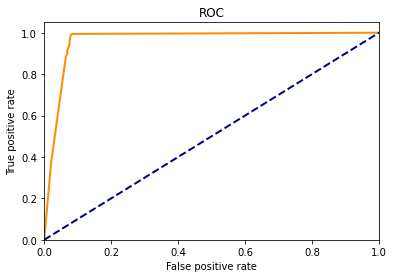

In [52]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(false_pos_rate, true_pos_rate, color='darkorange', lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.show()

In [56]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, pos_prob)

0.9653872063733817

In [58]:
from sklearn.model_selection import StratifiedKFold
k = 10
k_fold = StratifiedKFold(n_splits=k, random_state=42)
cleaned_emails_np = np.array(emails_cleaned)
labels_np = np.array(labels)

In [59]:
max_features_option = [2000, 8000, None]
smoothing_factor_option = [0.5, 1.0, 2.0, 4.0]
fit_prior_option = [True, False]
auc_record = {}

In [60]:
for train_indices, test_indices in k_fold.split(emails_cleaned, labels):
    X_train, X_test = cleaned_emails_np[train_indices], cleaned_emails_np[test_indices]
    Y_train, Y_test = labels_np[train_indices], labels_np[test_indices]
    for max_features in max_features_option:
        if max_features not in auc_record:
            auc_record[max_features] = {}
        cv = CountVectorizer(stop_words='english', max_features=max_features, max_df=0.5, min_df=2)
        term_docs_train = cv.fit_transform(X_train)
        term_docs_test = cv.transform(X_test)
        for alpha in smoothing_factor_option:
            if alpha not in auc_record[max_features]:
                auc_record[max_features][alpha] = {}
            for fit_prior in fit_prior_option:
                clf = MultinomialNB(alpha=alpha, fit_prior=fit_prior)
                clf.fit(term_docs_train, Y_train)
                prediction_prob = clf.predict_proba(term_docs_test)
                pos_prob = prediction_prob[:, 1]
                auc = roc_auc_score(Y_test, pos_prob)
                auc_record[max_features][alpha][fit_prior] = auc + auc_record[max_features][alpha].get(fit_prior, 0.0)

In [63]:
print('max_features smoothing fit_prior auc')
for max_features, max_feature_record in auc_record.items():
    for smoothing, smoothing_record in max_feature_record.items():
        for fit_prior, auc in smoothing_record.items():
            print(' {0} {1} {2} {3:.5f}'.format(max_features, smoothing, fit_prior, auc/k))

max_features smoothing fit_prior auc
 2000 0.5 True 0.97413
 2000 0.5 False 0.97407
 2000 1.0 True 0.97237
 2000 1.0 False 0.97238
 2000 2.0 True 0.97037
 2000 2.0 False 0.97050
 2000 4.0 True 0.96844
 2000 4.0 False 0.96835
 8000 0.5 True 0.98521
 8000 0.5 False 0.98526
 8000 1.0 True 0.98408
 8000 1.0 False 0.98417
 8000 2.0 True 0.98337
 8000 2.0 False 0.98344
 8000 4.0 True 0.98291
 8000 4.0 False 0.98287
 None 0.5 True 0.98890
 None 0.5 False 0.98884
 None 1.0 True 0.98899
 None 1.0 False 0.98904
 None 2.0 True 0.98906
 None 2.0 False 0.98915
 None 4.0 True 0.98965
 None 4.0 False 0.98969


In [64]:
max_features_option = [None]
smoothing_factor_option = [4.0, 10, 16, 20, 32]
fit_prior_option = [True, False]

In [65]:
for train_indices, test_indices in k_fold.split(emails_cleaned, labels):
    X_train, X_test = cleaned_emails_np[train_indices], cleaned_emails_np[test_indices]
    Y_train, Y_test = labels_np[train_indices], labels_np[test_indices]
    for max_features in max_features_option:
        if max_features not in auc_record:
            auc_record[max_features] = {}
        cv = CountVectorizer(stop_words='english', max_features=max_features, max_df=0.5, min_df=2)
        term_docs_train = cv.fit_transform(X_train)
        term_docs_test = cv.transform(X_test)
        for alpha in smoothing_factor_option:
            if alpha not in auc_record[max_features]:
                auc_record[max_features][alpha] = {}
            for fit_prior in fit_prior_option:
                clf = MultinomialNB(alpha=alpha, fit_prior=fit_prior)
                clf.fit(term_docs_train, Y_train)
                prediction_prob = clf.predict_proba(term_docs_test)
                pos_prob = prediction_prob[:, 1]
                auc = roc_auc_score(Y_test, pos_prob)
                auc_record[max_features][alpha][fit_prior] = auc + auc_record[max_features][alpha].get(fit_prior, 0.0)

In [66]:
print('max_features smoothing fit_prior auc')
for max_features, max_feature_record in auc_record.items():
    for smoothing, smoothing_record in max_feature_record.items():
        for fit_prior, auc in smoothing_record.items():
            print(' {0} {1} {2} {3:.5f}'.format(max_features, smoothing, fit_prior, auc/k))

max_features smoothing fit_prior auc
 2000 0.5 True 0.97413
 2000 0.5 False 0.97407
 2000 1.0 True 0.97237
 2000 1.0 False 0.97238
 2000 2.0 True 0.97037
 2000 2.0 False 0.97050
 2000 4.0 True 0.96844
 2000 4.0 False 0.96835
 8000 0.5 True 0.98521
 8000 0.5 False 0.98526
 8000 1.0 True 0.98408
 8000 1.0 False 0.98417
 8000 2.0 True 0.98337
 8000 2.0 False 0.98344
 8000 4.0 True 0.98291
 8000 4.0 False 0.98287
 None 0.5 True 0.98890
 None 0.5 False 0.98884
 None 1.0 True 0.98899
 None 1.0 False 0.98904
 None 2.0 True 0.98906
 None 2.0 False 0.98915
 None 4.0 True 1.97930
 None 4.0 False 1.97939
 None 10 True 0.99208
 None 10 False 0.99211
 None 16 True 0.99329
 None 16 False 0.99329
 None 20 True 0.99362
 None 20 False 0.99362
 None 32 True 0.99307
 None 32 False 0.99307


In [2]:
import os, glob

reviews = []
labels = []

file_path = 'txt_sentoken/pos/'
for filename in glob.glob(os.path.join(file_path, '*.txt')):
    with open(filename, 'r', encoding='ISO-8859-1') as infile:
        reviews.append(infile.read())
        labels.append(1)

file_path = 'txt_sentoken/neg/'
for filename in glob.glob(os.path.join(file_path, '*.txt')):
    with open(filename, 'r', encoding='ISO-8859-1') as infile:
        reviews.append(infile.read())
        labels.append(0)

print(len(reviews))
print(len(labels))

2000
2000


In [9]:
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
import numpy as np
def is_letter_only(word):
    return word.isalpha()
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

def clean_text(docs):
    docs_cleaned = []
    for doc in docs:
        doc = doc.lower()
        doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if is_letter_only(word) and word not in all_names)
        docs_cleaned.append(doc_cleaned)
    return docs_cleaned

reviews_cleaned = clean_text(reviews)
cleaned_reviews_np = np.array(reviews_cleaned)
labels_np = np.array(labels)

In [8]:
max_features_option = [2000, 8000, None]
smoothing_factor_option = [0.5, 1.0, 2.0, 4.0]
fit_prior_option = [True, False]
auc_record = {}

In [12]:
from sklearn.model_selection import StratifiedKFold
k = 10
k_fold = StratifiedKFold(n_splits=k)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

for train_indices, test_indices in k_fold.split(reviews_cleaned, labels):
    X_train, X_test = cleaned_reviews_np[train_indices], cleaned_reviews_np[test_indices]
    Y_train, Y_test = labels_np[train_indices], labels_np[test_indices]
    for max_features in max_features_option:
        if max_features not in auc_record:
            auc_record[max_features] = {}
        cv = CountVectorizer(stop_words='english', max_features=max_features, max_df=0.5, min_df=2)
        term_docs_train = cv.fit_transform(X_train)
        term_docs_test = cv.transform(X_test)
        for alpha in smoothing_factor_option:
            if alpha not in auc_record[max_features]:
                auc_record[max_features][alpha] = {}
            for fit_prior in fit_prior_option:
                clf = MultinomialNB(alpha=alpha, fit_prior=fit_prior)
                clf.fit(term_docs_train, Y_train)
                prediction_prob = clf.predict_proba(term_docs_test)
                pos_prob = prediction_prob[:, 1]
                auc = roc_auc_score(Y_test, pos_prob)
                auc_record[max_features][alpha][fit_prior] = auc + auc_record[max_features][alpha].get(fit_prior, 0.0)

In [19]:
print('max_features smoothing fit_prior   auc')
for max_features, max_feature_record in auc_record.items():
    for smoothing, smoothing_record in max_feature_record.items():
        for fit_prior, auc in smoothing_record.items():
            print('      {0}      {1}    {2}      {3:.5f}'.format(max_features, smoothing, fit_prior, auc/k))

max_features smoothing fit_prior   auc
      2000      0.5    True      0.88769
      2000      0.5    False      0.88769
      2000      1.0    True      0.88770
      2000      1.0    False      0.88770
      2000      2.0    True      0.88763
      2000      2.0    False      0.88763
      2000      4.0    True      0.88776
      2000      4.0    False      0.88776
      8000      0.5    True      0.88606
      8000      0.5    False      0.88606
      8000      1.0    True      0.88838
      8000      1.0    False      0.88838
      8000      2.0    True      0.89067
      8000      2.0    False      0.89067
      8000      4.0    True      0.89323
      8000      4.0    False      0.89323
      None      0.5    True      0.87950
      None      0.5    False      0.87950
      None      1.0    True      0.88333
      None      1.0    False      0.88333
      None      2.0    True      0.88851
      None      2.0    False      0.88851
      None      4.0    True      0.89306
      N